# Evaluation

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
np.random.seed(45)

In [198]:
df_iris = pd.read_csv('iris.csv')
print("df_iris.shape: {}".format(df_iris.shape))

df_iris.shape: (150, 5)


In [199]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [200]:
df_iris = df_iris.iloc[:100]

In [201]:
df_iris = df_iris.sample(frac=1).reset_index(drop=True)
df_iris['species'] = df_iris['species'].astype('category').cat.codes
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,6.0,2.2,4.0,1.0,1
3,6.8,2.8,4.8,1.4,1
4,4.9,3.1,1.5,0.1,0


In [202]:
X_train = df_iris[['sepal_length', 'sepal_width']][:67].values
Y_train = df_iris['species'][:67]

X_test = df_iris[['sepal_length', 'sepal_width']][67:].values
Y_test = df_iris['species'][67:]

print("X_train.shape: {}".format(X_train.shape))
print("Y_train.shape: {}".format(Y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("Y_test.shape: {}".format(Y_test.shape))

X_train.shape: (67, 2)
Y_train.shape: (67,)
X_test.shape: (33, 2)
Y_test.shape: (33,)


##  Not perfect classification

In [203]:
from sklearn.linear_model import SGDClassifier

In [204]:
clf = SGDClassifier(verbose=4, max_iter=3)

In [205]:
clf.fit(X_train, Y_train)

-- Epoch 1
Norm: 119.68, NNZs: 2, Bias: -19.257223, T: 67, Avg. loss: 66.478490
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 166.74, NNZs: 2, Bias: -19.194926, T: 134, Avg. loss: 31.188802
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 229.97, NNZs: 2, Bias: -27.896425, T: 201, Avg. loss: 27.636624
Total training time: 0.00 seconds.


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=3, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=4, warm_start=False)

In [206]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [207]:
X_train[Y_train == 0]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.9, 3.1],
       [4.4, 3. ],
       [4.7, 3.2],
       [5. , 3.4],
       [5.5, 4.2],
       [5. , 3.6],
       [5. , 3.4],
       [5.4, 3.7],
       [4.8, 3. ],
       [4.9, 3.1],
       [5.4, 3.4],
       [5.7, 3.8],
       [5.1, 3.8],
       [5. , 3. ],
       [5.1, 3.7],
       [5.1, 3.3],
       [4.7, 3.2],
       [5.4, 3.9],
       [5.2, 3.4],
       [5. , 3.5],
       [5.1, 3.8],
       [5.2, 3.5],
       [5.1, 3.4],
       [4.6, 3.6],
       [4.5, 2.3],
       [5.3, 3.7],
       [4.6, 3.2],
       [5.4, 3.9],
       [4.3, 3. ],
       [5. , 3.3],
       [5. , 3.5],
       [4.8, 3.4],
       [4.4, 3.2],
       [4.6, 3.4]])

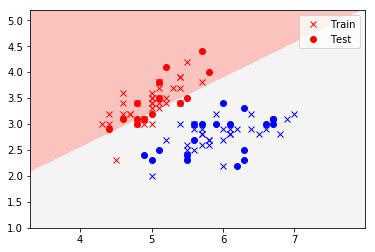

In [208]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'rx', label='Train')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bx')
plt.plot(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], 'ro', label='Test')
plt.plot(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], 'bo')
plt.legend()
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

## Accuracy

In [209]:
print("X_test.shape: {}".format(X_test.shape))
print("Y_test.shape: {}".format(Y_test.shape))

X_test.shape: (33, 2)
Y_test.shape: (33,)


In [216]:
train_accuracy = np.mean(Y_train == clf.predict(X_train))
test_accuracy = np.mean(Y_test == clf.predict(X_test))

print("train accuracy: {}".format(train_accuracy))
print("test accuracy: {}".format(test_accuracy))

train accuracy: 0.8955223880597015
test accuracy: 0.8484848484848485


In [217]:
from sklearn.metrics import accuracy_score

print("train accuracy: {}".format(accuracy_score(Y_train, clf.predict(X_train))))
print("test accuracy: {}".format(accuracy_score(Y_test, clf.predict(X_test))))

train accuracy: 0.8955223880597015
test accuracy: 0.8484848484848485


## Presicion & recall

In [251]:
Y_pred_train = clf.predict(X_train)
train_precision_red = np.sum((Y_pred_train == 1) & (Y_train == 1)) / np.sum(Y_pred_train == 1)
Y_pred_test = clf.predict(X_test)
test_precision_red = np.sum((Y_pred_test == 1) & (Y_test == 1)) / np.sum(Y_pred_test == 1)

print("train precision for blue: {}".format(train_precision_red))
print("test precision for blue: {}".format(test_precision_red))

train precision for blue: 0.8157894736842105
test precision for blue: 0.7916666666666666


In [254]:
Y_pred_train = clf.predict(X_train)
train_recall_red = np.sum((Y_pred_train == 1) & (Y_train == 1)) / np.sum(Y_train == 1)
Y_pred_test = clf.predict(X_test)
test_recall_red = np.sum((Y_pred_test == 1) & (Y_test == 1)) / np.sum(Y_test == 1)

print("train recall for blue: {}".format(train_recall_red))
print("test recall for blue: {}".format(test_recall_red))

train recall for blue: 1.0
test recall for blue: 1.0


In [223]:
from sklearn.metrics import precision_score

print("train precision for blue: {}".format(precision_score(Y_train, clf.predict(X_train), pos_label=1)))
print("test precision for blue: {}".format(precision_score(Y_test, clf.predict(X_test), pos_label=1)))

train precision for red: 1.0
test precision for red: 1.0
train precision for blue: 0.8157894736842105
test precision for blue: 0.7916666666666666


In [224]:
from sklearn.metrics import recall_score

print("train recall for blue: {}".format(recall_score(Y_train, clf.predict(X_train), pos_label=1)))
print("test recall for blue: {}".format(recall_score(Y_test, clf.predict(X_test), pos_label=1)))

train recall for red: 0.8055555555555556
test recall for red: 0.6428571428571429
train recall for blue: 1.0
test recall for blue: 1.0


In [ ]:
print("train precision for red: {}".format(precision_score(Y_train, clf.predict(X_train), pos_label=0)))
print("test precision for red: {}".format(precision_score(Y_test, clf.predict(X_test), pos_label=0)))

print("train recall for red: {}".format(recall_score(Y_train, clf.predict(X_train), pos_label=0)))
print("test recall for red: {}".format(recall_score(Y_test, clf.predict(X_test), pos_label=0)))

## ROC

In [280]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, clf.predict(X_test), pos_label=1)
roc_auc = auc(fpr, tpr)

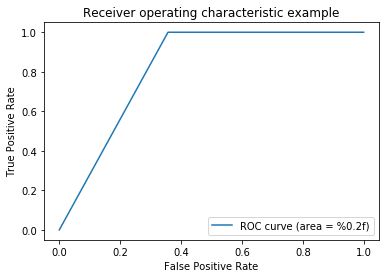

In [281]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")